####  Rasmni yuklab olish uchun kerakli modullarni chaqiramiz

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

#### Test qilish uchun rasmlarni yuklab olamiz 

In [2]:
images = np.array([np.array(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)) for file in glob.glob('rasmlar/*.jpg')])

#### Rasmlarni gray holatda chiqaramiz 

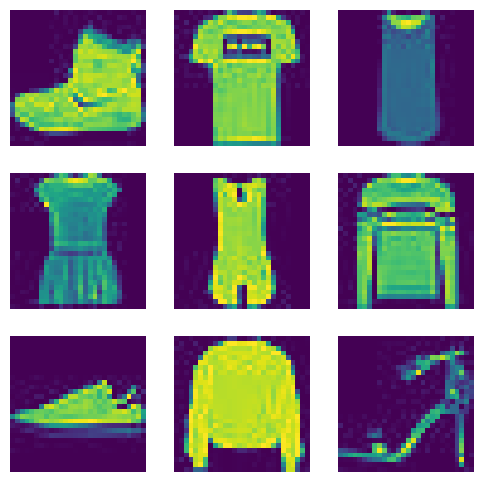

In [3]:
fig, axs = plt.subplots(3, 3, figsize=(6,6))

for i, ax in enumerate(axs.flatten()):
    if i < len(images):
        ax.imshow(images[i])
    ax.axis('off')
plt.show()

#### Rasmlar matritsalari qiymatlarini float32 formatga keltiramiz, normallashtiramiz va shape ni modelga berish uchun moslashtiramiz

In [4]:
images = images.astype('float32')/255
images = images.reshape(9,28,28,1)

#### Rasmlarni qiymatlarini bashorat qilish uchun Modelni yuklab olamiz

In [5]:
import tensorflow as tf
model = tf.keras.models.load_model("model.h5")

#### Rasmlarni predict qilamiz

In [6]:
one_hot_encoding_label = model.predict(images)
one_hot_encoding_label.round(6)

1/1 [==============================] - 0s 118ms/step


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.50000e-05, 0.00000e+00, 1.72000e-03, 0.00000e+00, 9.98244e-01],
       [9.99913e-01, 0.00000e+00, 1.10000e-05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.60000e-05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [9.08865e-01, 2.00000e-05, 1.14920e-02, 7.22000e-03, 7.02000e-04,
        4.00000e-06, 7.14810e-02, 5.00000e-06, 2.12000e-04, 1.00000e-06],
       [5.28500e-03, 1.90000e-04, 4.34000e-04, 9.88960e-01, 1.66000e-04,
        1.00000e-06, 4.95500e-03, 0.00000e+00, 7.00000e-06, 2.00000e-06],
       [3.83370e-01, 2.17000e-03, 5.88300e-03, 2.30975e-01, 3.63900e-03,
        6.81000e-04, 3.68945e-01, 8.90000e-04, 2.99100e-03, 4.56000e-04],
       [0.00000e+00, 0.00000e+00, 9.99982e-01, 0.00000e+00, 1.00000e-06,
        0.00000e+00, 1.70000e-05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.00000e-06, 0.00000e+00, 9.99980e-01

#### Natija sifatida olingan one hot encoding labellaridan natijani olamiz 

In [7]:
target = []
for i in range(len(images)):
    target.append(np.argmax(one_hot_encoding_label[i]))

classlar = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
for i in target:
    print(classlar[i])

Ankle boot
T-shirt
T-shirt
Dress
T-shirt
Pullover
Sneaker
Pullover
Sandal
